In [18]:
import numpy as np
import matplotlib.pyplot as plt
# Loading the .mat file
from scipy.io import loadmat
data = loadmat("Indian_pines_corrected.mat")
print(data.keys())                            #cheking what variables are inside the file 
                                              #the actual hyperspectral cube is stored in "indian_pines_corrected"

dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_corrected'])


In [12]:
# Extracting the hyperspectral cube
cube = data['indian_pines_corrected']
print(cube.shape)                      # Meaning: there are 145 rows, 145 colums and 200 spectral bands

(145, 145, 200)


In [13]:
# Extracting a single band
band_50 = cube[:, :, 50]
print(band_50)

[[4783 5254 5342 ... 3987 4049 4262]
 [4630 5111 5281 ... 4505 4465 4601]
 [4563 5010 5191 ... 4346 4229 4195]
 ...
 [6151 6350 6855 ... 6625 6183 6301]
 [6346 6576 6883 ... 6291 6301 6882]
 [6437 6933 7033 ... 6647 6310 6417]]


In [14]:
# Extracting the 200-value spectrum of a single pixel
pixel_spectrum = cube[50, 80, :]             # Extracts the 200 spectrum values for the pixel located at (50, 80)
print(pixel_spectrum)

[2765 4374 4784 4564 5020 5347 5578 5424 5445 5175 5189 5240 5046 5214
 5316 5346 5276 5168 5115 5006 5037 5057 5056 4966 5009 4978 4864 4994
 5000 4641 4780 4552 4777 4961 4825 4661 5245 5520 5396 3740 5480 5530
 5307 5277 4948 4550 4737 5094 5111 5134 5087 5084 5026 4135 3993 3909
 2743 2202 2310 2593 3327 3850 4315 4539 4440 4458 4423 4361 4297 4310
 4144 4071 3981 3864 2633 2816 1708 1568 1858 1769 2343 2932 3071 3035
 3160 3123 3197 3248 2598 3324 3178 2877 2961 3176 2842 3030 3074 2862
 2601 2366 1924 1619 1104 1046 1068 1115 1141 1284 1397 1306 1434 1727
 1999 2173 2311 2373 2406 2419 2393 2254 2267 2313 2259 2258 2303 2295
 2231 2221 2208 2162 2139 2110 2049 2002 1970 1885 1838 1797 1739 1619
 1457 1333 1162 1050 1034 1049 1116 1262 1357 1290 1114 1119 1258 1401
 1382 1296 1282 1342 1417 1424 1454 1435 1439 1430 1430 1396 1390 1390
 1382 1364 1358 1374 1374 1356 1341 1316 1290 1289 1279 1258 1258 1258
 1243 1236 1203 1195 1185 1153 1144 1154 1146 1118 1116 1117 1091 1071
 1081 

In [15]:
print(pixel_spectrum.size)

200


In [16]:
# Log Transformation Function:
def log_transform(image, c = 1.0):  # c = 1 is perfect to use, if the image is normalized 
                                    # c = 1 -> normal log enhancement (balanced contrast)
                                    # c > 1 -> image becomes brighter (stronger enhancement of dark regions)
                                    # c < 1 -> low intensity enhancement

    # Convert image to float
    image = image.astype(np.float32)

    # Normalizing the image to [0, 1]
    R = (image - np.min(image))/(np.max(image) - np.min(image) + 1e-12)

    # Applying log transformation S = log(1+R)
    S = c*np.log1p(R)   # this is mathematically identical to np.log(1+R), but it is more stable for small values

    # normalizing the transformed image to [0,1]
    S_norm = (S - np.min(S))/(np.max(S) - np.min(S) + 1e-12)

    return S_norm


In [22]:
# applying it to band 50 of our hyperspectral cube
log_band = log_transform(band_50, c=1.0)

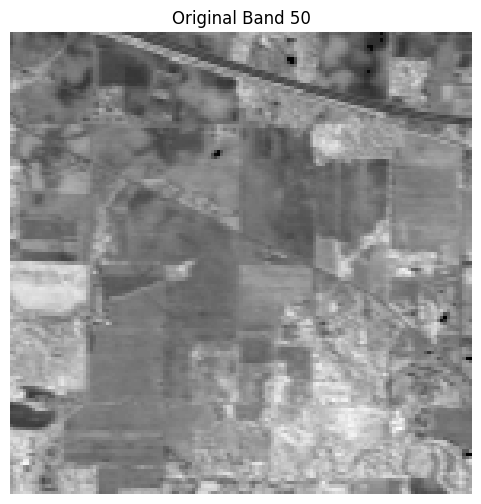

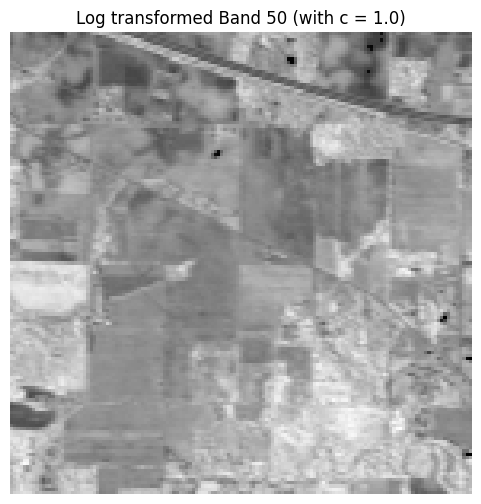

In [23]:
# visulaizing
plt.figure(figsize=(6,6))
plt.title("Original Band 50")
plt.imshow(band_50, cmap="grey")
plt.axis('off')

plt.figure(figsize=(6,6))
plt.title("Log transformed Band 50 (with c = 1.0)")
plt.imshow(log_band, cmap='grey')
plt.axis('off')

plt.show()

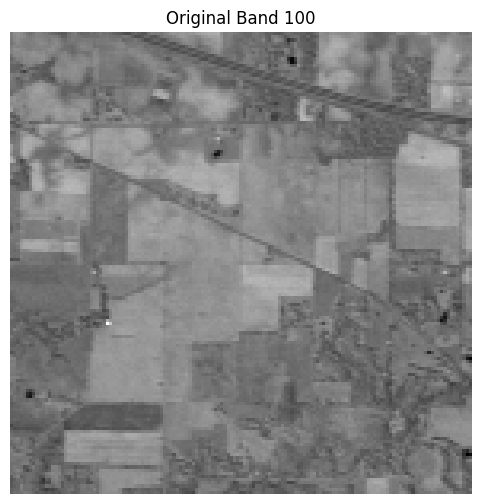

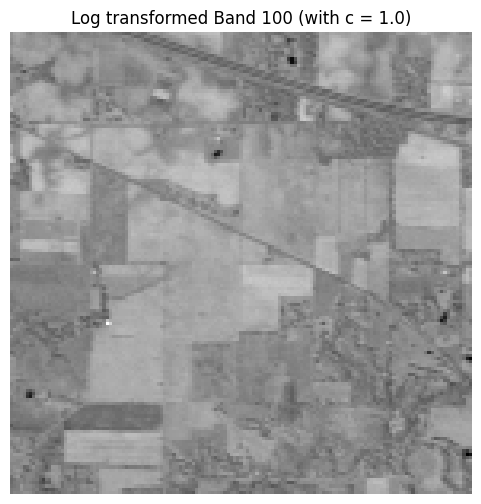

In [26]:
band_100 = cube[:, :, 100]
log_band_100 = log_transform(band_100, c=1.0)
plt.figure(figsize=(6,6))
plt.title("Original Band 100")
plt.imshow(band_100, cmap="grey")
plt.axis('off')

plt.figure(figsize=(6,6))
plt.title("Log transformed Band 100 (with c = 1.0)")
plt.imshow(log_band_100, cmap='grey')
plt.axis('off')

plt.show()

APPLYING LOG TRANSFORMATION TO AVERAGE OF ALL BANDS

In [27]:
# What does average image mean: For each pixel (x, y), you take mean across all 200 spectral bands
# This will produce a 2-D grayscale image of shape: (145 x 145)

avg_image = np.mean(cube, axis = 2) #shape becomes 145 x 145
print("Average image shape: ", avg_image.shape)

Average image shape:  (145, 145)


In [28]:
# Applying log transformation to the average image

log_avg = log_transform(avg_image, c = 1.0)

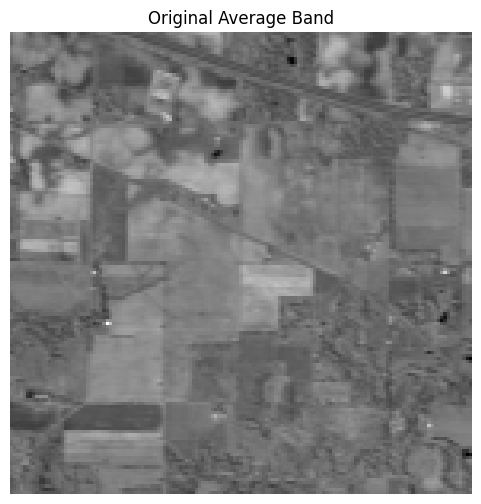

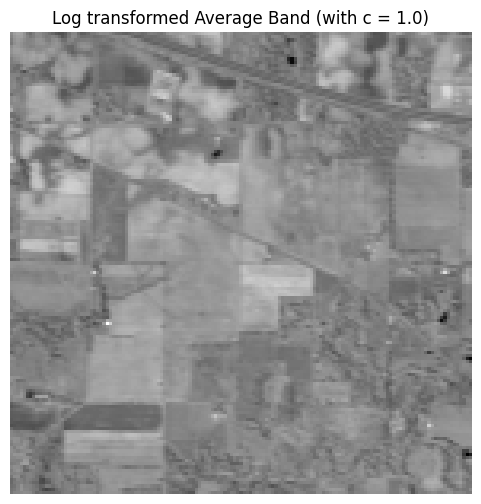

In [29]:
#visualizing the results: 

plt.figure(figsize=(6,6))
plt.title("Original Average Band")
plt.imshow(avg_image, cmap="grey")
plt.axis('off')

plt.figure(figsize=(6,6))
plt.title("Log transformed Average Band (with c = 1.0)")
plt.imshow(log_avg, cmap='grey')
plt.axis('off')

plt.show()
